# MTH4000 Programming in Python I - Lecture 7

Module organisers Dr Matthew Lewis and Prof. Thomas Prellberg

In the first half of this module, we focussed on introducing the basics of programming, i.e. data structures and flow control. We have already encountered several applications along the way, such as graphing functions and numerical evaluation of infinite sums, albeit at a very basic level.

Now that we have learned enough Python, we can start to consider designing algorithms in more depth. We will look at three problems: computing the GCD, arrangements of parentheses, and root finding.

## Greatest Common Divisor

Let's start with Euclid's algorithm, which you have already encountered in Numbers, Sets, and Functions. The basis was the following Lemma.

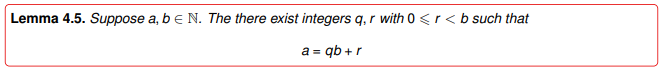

You will recognise that this is just what Python does with integer division with remainder.

In [1]:
a, b = 14, 4

print("If a =",a,"and b =",b)

q, r = a//b, a%b

print("then q =",q,"and r =",r)

print()

print(a,"=", q,"*",b,"+",r,":", a==q*b+r)

If a = 14 and b = 4
then q = 3 and r = 2

14 = 3 * 4 + 2 : True


Next, we use the following Proposition.

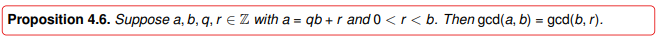

This implies in for our case that $\mathrm{gcd}(14,4)$ is equal to $\mathrm{gcd}(4,2)$. Using the proposition we can continue this.

In [2]:
a, b = 4, 2

print("If a =",a,"and b =",b)

q, r = a//b, a%b

print("then q =",q,"and r =",r)

print()

print(a,"=", q,"*",b,"+",r,":", a==q*b+r)

If a = 4 and b = 2
then q = 2 and r = 0

4 = 2 * 2 + 0 : True


As $r=0$, we have that $2|4$ and we are done: $\mathrm{gcd}(14,4)=\mathrm{gcd}(4,2)=2$.

This leads to following prescription:

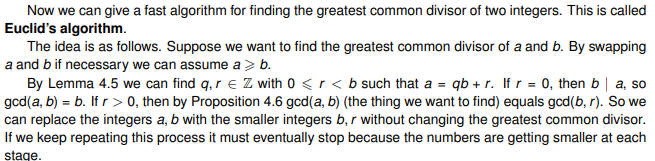

This is a "chatty" description of what's needed. But how do we turn this into something that can be automated, so that a computer can do it. By carefully writing the steps down one by one, we can turn this description into an [algorithm](http://en.wikipedia.org/wiki/Algorithm).

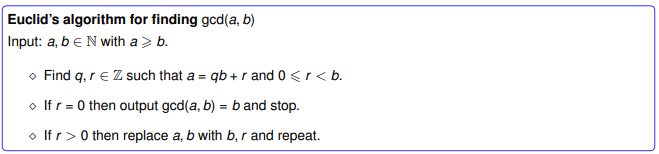

This can be easily written in Python as follows (using the above method to find $q$ and $r$).

In [3]:
def euclid0(a,b):
    "takes two positive integers a,b with a>=b and computes gcd(a,b)"
    # first step:
    q,r=a//b,a%b
    # second step:
    if r==0:
        return b
    # third step:
    if r>0:
        a,b=b,r
        return euclid0(a,b)
    # this should cover all the cases. But if we have missed anything:
    return("error")

Now run a few tests:

In [4]:
euclid0(120,48)

24

The function, as written, works but is somewhat inelegant. It shows that the above box was not written with programming in mind. Let's revisit it.

One simple observation is that if we use $a<b$ then $q$ is simply zero and we get $r=b$, so the line `a,b=b,r` simply swaps `a` and `b` and we're fine again.

In [5]:
euclid0(48,120)

24

This, and some other minor simplifications concerning the order of logic (moving more towards using if-else) give:

#### Algorithm

Algorithm to compute $\mathrm{gcd}(a,b)$:

Input: $a,b$ positive integers.
* Find integers $q,r$ such that $a=qb+r$ and $0\leq r<b$.
* If $r>0$ then return $\mathrm{gcd}(b,r)$.
* Otherwise return $b$.


In [6]:
def euclid1(a,b):
    "takes two positive integers a,b and computes gcd(a,b)"
    # first step:
    q,r=a//b,a%b
    # second step:
    if r>0:
        return euclid1(b,r)
    # third step:
    else:
        return b

Note that $q$ is not really needed at all, and that `r>0` has the same truth value as `r` itself! We can further simplify to:

In [7]:
def euclid2(a,b):
    "takes two positive integers a,b and computes gcd(a,b)"
    # first step
    r=a%b
    # second step
    if r:
        return euclid2(b,r)
    # third step
    else:
        return b

#### Refinements

If we allow $b=0$ as input, we can make this even simpler! We first check if $b$ is zero (in which case we are done and can return $a$). Otherwise we compute the remainder $r$ and compute $\mathrm{gcd}(b,r)$. 

#### Algorithm

Algorithm to compute $\mathrm{gcd}(a,b)$:

Input: $a$ a positive integer and $b$ a non-negative integer.
* If $b>0$ then return $\mathrm{gcd}(b,a\%b)$.
* Otherwise, return $a$.

I changed the logic a bit, as this feels more natural and leads to a simple `if b:` in the code.


In [8]:
def euclid3(a,b):
    if b:
        return euclid3(b,a%b)
    else:
        return a

We have now gotten rid of all assignments in the function (there are no equals signs)! I am quite happy about this, as This means that I can use some Python trickery to turn this into a one-liner. (Technically, this uses a "ternary if" construction which I won't talk about until the last lecture, I just couldn't resist showing it here.)

In [9]:
euclid4=lambda a,b: euclid4(b,a%b) if b else a

Isn't this just beautiful? I always feel that I only really understand a problem if I can condense code to that level of brevity. Please note the profound difference to the algorithm given in NSF:

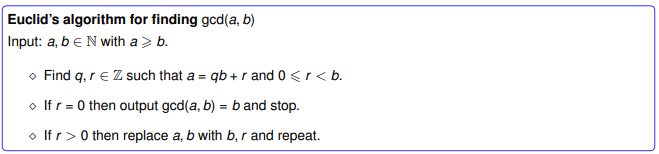

We have moved from that algorithm to

**Euclid's algorithm for finding $\mathrm{gcd}(a,b)$**

Input: $a\in\mathbb N$, $b\in\mathbb N_0$.

- If $b=0$ then output $a$ and stop.
- If $b>0$ then output $\mathrm{gcd}(b,a\%b)$ 

And this is it. Technically, to mirror the NSF algorithm, I should have written the last line as:

- If $b>0$ then find $r\in\mathbb Z$ such that $0\leq r<b$ and $a=qb+r$ for some $q\in\mathbb Z$ and output $\mathrm{gcd}(b,r)$.

But we know how to find $r$...




Finally, we have gotten quite close to what Python is using. As a rule, recursion is elegant but a bit wasteful, so Python's implementation is doing essentially the same, but in a while loop. In a nutshell, Python's code is based on

In [10]:
def python_gcd(a,b):
    while b:
        a,b=b,a%b
    return a

You should convince yourself that this is an equivalent formulation.

#### Testing

I delayed testing of all these different functions, so let's just do this now in one fell swoop with lots of randomly chosen examples.

In [11]:
from random import randint

for _ in range(50):
    a,b=randint(1,100000),randint(1,100000)
    print(a,"\t",b,"\t:\t",euclid0(a,b),euclid1(a,b),euclid2(a,b),euclid3(a,b),euclid4(a,b),python_gcd(a,b))

80417 	 25766 	:	 1 1 1 1 1 1
19363 	 77937 	:	 1 1 1 1 1 1
43303 	 70702 	:	 1 1 1 1 1 1
53573 	 60457 	:	 1 1 1 1 1 1
67136 	 57086 	:	 2 2 2 2 2 2
61409 	 6691 	:	 1 1 1 1 1 1
70061 	 2843 	:	 1 1 1 1 1 1
66181 	 99559 	:	 1 1 1 1 1 1
77761 	 78622 	:	 1 1 1 1 1 1
34307 	 31660 	:	 1 1 1 1 1 1
4617 	 47596 	:	 1 1 1 1 1 1
58469 	 17524 	:	 1 1 1 1 1 1
2844 	 8900 	:	 4 4 4 4 4 4
45091 	 30225 	:	 1 1 1 1 1 1
88667 	 65762 	:	 1 1 1 1 1 1
57404 	 13642 	:	 2 2 2 2 2 2
10141 	 96997 	:	 1 1 1 1 1 1
46776 	 12051 	:	 3 3 3 3 3 3
21776 	 23848 	:	 8 8 8 8 8 8
23478 	 52128 	:	 6 6 6 6 6 6
98212 	 96227 	:	 1 1 1 1 1 1
51456 	 98648 	:	 8 8 8 8 8 8
81326 	 69949 	:	 1 1 1 1 1 1
30454 	 6486 	:	 2 2 2 2 2 2
32277 	 81061 	:	 1 1 1 1 1 1
6435 	 30446 	:	 13 13 13 13 13 13
15704 	 27104 	:	 8 8 8 8 8 8
58766 	 42557 	:	 1 1 1 1 1 1
71847 	 43878 	:	 3 3 3 3 3 3
44432 	 19514 	:	 2 2 2 2 2 2
59749 	 46337 	:	 1 1 1 1 1 1
46869 	 63046 	:	 1 1 1 1 1 1
55974 	 77919 	:	 57 57 57 57 57 57
6711 

``` All my pretty ones?
    Did you say All? Oh Hell-Kite! All?
    What, All my pretty Chickens, and their Damme
    At one fell swoope?
                            (Shakespeare, Macbeth, 1605)
```

## Arrangements of a Given Number of Parentheses

The next problem we wish to look at is arrangements of pairs of open brackets "(" and closed brackets ")" so that every open bracket has a matching closed bracket to the right. To most of you, this should by now be a familiar issue as any 'illegal arrangement' of brackets in arithmetic expressions gives you an error in Python.

Let's start small: For one pair of brackets, there is only one arrangement 
```
()
```
For two pairs, we easily find
```
(()) and ()()
```
and for three pairs, we find
```
((())), (()()), ()(()), (())(), and ()()()
```
and so forth. 

Let's see what can go wrong: observe that `())...` cannot possibly be legal, as the second closed bracket has no matching open bracket to the left. 

We quickly arrive at the following conditions:

1. When reading left to right, there must be at least as many open brackets as closed brackets.

We don't have to check for equal numbers immediately. 

2. When we're done reading through the string, the number of open and closed brackets must be equal.

The latter condition makes sure that we avoid `((()`, for example.

### Checking if an Arrangement of Parentheses is Legal

We can use the two conditions above to check if an arrangement is allowed.

The idea is to go iterate through the string from left to right and count the difference between open and closed brackets, i.e., add one for an open bracket and subtract one for a closed bracket). If this number stays non-negative and is zero at the end, we are fine. 

Some examples:

- Consider the arrangement "(()())". Starting at zero and counting from left to right, we find 0,1,2,1,2,1,0, and hence the arrangement is legal.
- Consider the arrangement "())(()". Starting at zero and counting from left to right, we find 0,1,0,-1,... (we may as well stop here) and hence the arrangement is not legal.
- Consider the arrangement "())((". Starting at zero and counting from left to right, we find 0,1,2,1,2,1 and hence the arrangement is not legal.

Let's formalise this.

#### Algorithm

Algorithm to compute legality of arrangement of parentheses:

Input: string containing open and closed brackets
* Initialise counter to zero.
* For each character in the string:
    - If character is open bracket then increment counter.
    - If character is closed bracket then decrement counter.
    - If counter is negative: return False. (This checks the first condition)
* If counter is positive: return False, otherwise return True. (This checks the second condition)

Let's try this out. We can translate this into Python quite literally

In [12]:
def is_legal(s):
    counter=0
    for c in s: # note that we can loop through the characters directly, no need for silly indices!
        if c=="(":
            counter=counter+1
        if c==")":
            counter=counter-1
        if counter<0:
            return False
    if counter>0:
        return False
    else:
        return True

This works on legal strings.

In [13]:
is_legal(""),is_legal("()"),is_legal("()()"), is_legal("(())")

(True, True, True, True)

And this also works on illegal strings.

In [14]:
is_legal(")"),is_legal("(()"),is_legal("()(("), is_legal("((())")

(False, False, False, False)

But let us improve this further. We can replace the second `if` by an `else`, and clean up the awful boolean tests at the end by observing that we just need to return `counter==0`.

In [15]:
def is_legal(s):
    counter=0
    for c in s:
        if c=="(":
            counter=counter+1
        else:
            counter=counter-1
        if counter<0:
            return False
    return counter==0

In principle we are now done. We should be kind to the user of this function, so add a document string and also some warnings if the wrong argument is provided:

In [16]:
def is_legal(s):
    '''takes an arrangement of open and closed brackets and checks for legality'''
    if type(s)!=str:
        return "warning: argument needs to be a string"
    if any(c not in "()" for c in s):
        return "warning: string contains not just open and closed brackets"
    counter=0
    for c in s:
        if c=="(":
            counter=counter+1
        else:
            counter=counter-1
        if counter<0:
            return False
    return counter==0

Note that we did not number these functions as we did above, so only the function definition from the last executed codebox is now used.

### Counting Arrangements of $n$ Pairs of Parentheses

We now wish to count the number of ways to arrange, say, 19 pairs of brackets. Doing this by hand looks very tedious and error prone, so we wish to employ the help of Python to help us.

### Brute-force counting

A brute-force approach would be to generate all arrangements of $n$ pairs of brackets and check each one for legality. To start with, we need to place $n$ open brackets in a string of length $2n$.

We write a function that takes the positions of $n$ open brackets, say 0,1 and 3, and returns a string of length $2n$ which has open brackets in precisely these positions (and closed brackets otherwise).

In [17]:
def create_arrangement(c):
    "create bracket arrangement from combination"
    l=list(2*len(c)*")") # create list of length 2n with closed brackets; we need a list as a string is not mutable
    for i in c:
        l[i]="("         # overwrite i'th entry with open bracket
    return "".join(l)    # convert to string and return

In [18]:
# test this
create_arrangement([0,1,3])

'(()())'

Given $n$ open brackets in $2n$ positions, there are precisely $\binom{2n}n$ ways to create such arrangements.

Using a black-box import, this is easy to do. In a quick (and dirty?) way, we will use the function `combinations` from Python's module `itertools`. Let's import it and look at the help provided.

In [19]:
from itertools import combinations

help(combinations)

Help on class combinations in module itertools:

class combinations(builtins.object)
 |  combinations(iterable, r)
 |  
 |  Return successive r-length combinations of elements in the iterable.
 |  
 |  combinations(range(4), 3) --> (0,1,2), (0,1,3), (0,2,3), (1,2,3)
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  __setstate__(...)
 |      Set state information for unpickling.
 |  
 |  __sizeof__(...)
 |      Returns size in memory, in bytes.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



This is a mouthful, but we only need 

    combinations(iterable, r)
    
    Return successive r-length combinations of elements in the iterable.    
    
This means we need to provide some iterable (range, list, ...) and the number of objects we want from that iterable.

Let's have a look:

In [20]:
for c in combinations(range(4),3):
    print(c)

(0, 1, 2)
(0, 1, 3)
(0, 2, 3)
(1, 2, 3)


We have successfully generated all four choices of three elements from $\{0,1,2,3\}$, each one returned as a tuple.

Now we can convert the combinations to arrangements of parentheses and test their legality:

In [21]:
N=3
for c in combinations(range(2*N),N):
    s=create_arrangement(c)
    print(c, s, is_legal(s))

(0, 1, 2) ((())) True
(0, 1, 3) (()()) True
(0, 1, 4) (())() True
(0, 1, 5) (()))( False
(0, 2, 3) ()(()) True
(0, 2, 4) ()()() True
(0, 2, 5) ()())( False
(0, 3, 4) ())(() False
(0, 3, 5) ())()( False
(0, 4, 5) ()))(( False
(1, 2, 3) )((()) False
(1, 2, 4) )(()() False
(1, 2, 5) )(())( False
(1, 3, 4) )()(() False
(1, 3, 5) )()()( False
(1, 4, 5) )())(( False
(2, 3, 4) ))((() False
(2, 3, 5) ))(()( False
(2, 4, 5) ))()(( False
(3, 4, 5) )))((( False


This seems to work fine. Let's use it to count.

In [22]:
def count_arrangements(n):
    return sum([is_legal(create_arrangement(c)) for c in combinations(range(2*n),n)]) # note that for the counting we use again that True evaluates to 1

print([count_arrangements(k) for k in range(12)])

[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862, 16796, 58786]


This works, but it will be very hard to use for larger values of $n$. We need a better algorithm!

### A different view of the same idea

If we pick $\binom{2n}n$ open brackets, the other half must be closed. We bypass `create_arrangement()` and do our testing directly by creating two lists of bracket positions, open and closed, respectively. As every combination from `combinations(range(2*n,n))` gives us a list of positions of open brackets, the list of closed bracket positions is already uniquely defined:

In [23]:
def closed_list(open_list):
    return [i for i in range(2*len(open_list)) if i not in open_list] # I am using another new feature here: the `if` keyword is used to do filtering, only selected `i` are included in the list comprehension

# the example should give the missing entries in [0,1,2,3,4,5], i.e. [0,2,5]
closed_list([1,3,4])

[0, 2, 5]

Now we can translate the legality check by simply saying that the i'th open bracket has to come before the i'th closed bracket.

In [24]:
def is_legal_list(c):
    return all(i<j for i,j in zip(c,closed_list(c))) # And another new feature: `all()` checks if all conditions are satisfied. The counterpart `any()` exists as well.

Do the counting again:

In [25]:
def count_arrangements_v2(n):
    return sum([is_legal_list(c) for c in combinations(range(2*n),n)])

print([count_arrangements_v2(k) for k in range(12)])

[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862, 16796, 58786]


This takes about the same time, as we would expect. After all, it's the same idea, just coded up differently.

### A better algorithm

The strength of the following algorithm is that it allows for a recursive description. We "chop" the arrangement of parentheses into smaller bits.

#### Development of the Algorithm

Assume we have a legal arrangement of $n$ pairs of parentheses, i.e. of total length $2n$. 

##### Dividing up the arrangement

We observe that the first bracket must be an open bracket. We associate to this the closed bracket that matches this open bracket. In the spirit of the above legality testing algorithm, this will be the first bracket for which the counter reaches zero. We now have a uniquely defined pair of matching brackets.

The crucial observation is now that both
- the arrangement inside this pair of brackets is a valid, possibly empty, arrangement
- the arrangement to the right of this pair of brackets is a valid, possibly empty, arrangement

As an example, consider the arrangement "((()()))(())" of six pairs of brackets.

We note that the closed bracket associated to the first open bracket is at index $7=2\cdot 3+1$.

It divides the arrangement into "(" + "(()())" + ")" + "(())", i.e., it encloses "(()())" of length $2\cdot 3$ and leaves "(())" of length $2\cdot 2$ to the right.

In other words, the first pair of brackets separates the arrangement of length $2\cdot 6$ into two smaller arrangements of length $2\cdot 3$ and length $2\cdot 2$.

In general, as the arrangement inside this pair of brackets is valid, the associated closed bracket must be matched by an open bracket to the left. This forces that closed bracket to be at a position indexed by an odd number $1,3,5,\ldots,2n-1$.

If the closed bracket is at index $2m+1$ (for $m=0,\ldots,n-1$), then the pair of brackets divides up the arrangement into "(" + arrangement of length $2m$ + ")" + arrangement of length $2(n-m-1)$.

##### Using the division for counting

If the first pair of brackets divides up the arrangement of length $2n$ into two smaller arrangements of respective lengths $2m$ and $2(n-m-1)$, then the total number such legal arrangements is given by the product
$$C_mC_{n-m-1}$$
where $C_k$ is the number of legal arrangements of length $2k$. Summing over all possible values of $m$, we therefore find
$$C_n=\sum_{m=0}^{n-1}C_mC_{n-m-1}=C_0C_{n-1}+C_1C_{n-2}+\ldots+C_{n-1}C_0\;.$$

 #### The algorithm
 
 Input: number of brackets $n\geq0$
 
 - If $n=0$ return 1
 - Otherwise return $\sum_{m=0}^{n-1}C_mC_{n-m-1}$

In [26]:
def count_arrangements(n):
    if n==0:
        return 1
    else:
        return sum([count_arrangements(m)*count_arrangements(n-m-1) for m in range(n)])
    
print([count_arrangements(k) for k in range(12)])

[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862, 16796, 58786]


This seems faster. Let's go to $n=15$.

In [27]:
print([count_arrangements(k) for k in range(16)])

[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862, 16796, 58786, 208012, 742900, 2674440, 9694845]


Unfortunately $n=19$ is still out of reach. The reason is that we unnecessarily repeat computations many times, as the algorithm does not "memorize" any results.

### Improving the Algorithm: storing intermediate results

In [28]:
def count_arrangements(n):
    list_of_counts=[1] # store value for n=0
    for k in range(1,n+1):
        list_of_counts.append(sum([list_of_counts[m]*list_of_counts[k-m-1] for m in range(k)]))
    return(list_of_counts[-1])

print([count_arrangements(k) for k in range(16)])

[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862, 16796, 58786, 208012, 742900, 2674440, 9694845]


Note the incredible improvement in speed! Now we're in business. Why not just go to 1000:

In [29]:
print(count_arrangements(1000))

2046105521468021692642519982997827217179245642339057975844538099572176010191891863964968026156453752449015750569428595097318163634370154637380666882886375203359653243390929717431080443509007504772912973142253209352126946839844796747697638537600100637918819326569730982083021538057087711176285777909275869648636874856805956580057673173655666887003493944650164153396910927037406301799052584663611016897272893305532116292143271037140718751625839812072682464343153792956281748582435751481498598087586998603921577523657477775758899987954012641033870640665444651660246024318184109046864244732001962029120


What we have actually studied here are the famous [Catalan Numbers](https://en.wikipedia.org/wiki/Catalan_number), first explored by Leonhard Euler over 270 years ago,

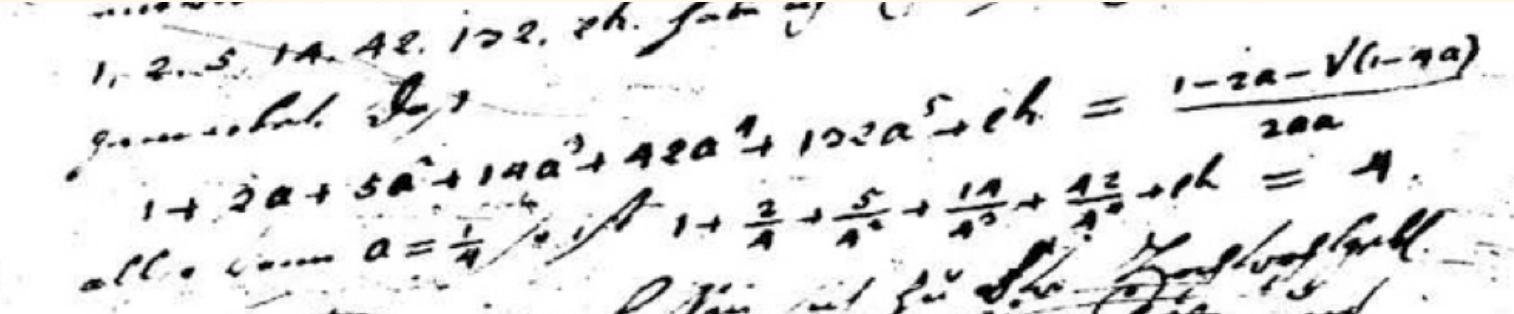


                Letter by Leonhard Euler to Christian Goldbach, 1751

They appear in many areas of mathematics, and have the explicit formula
$$C_n=\frac1{n+1}\binom{2n}n\;.$$

This leads to the recursion
$$C_n=2\frac{2n-1}{n+1}C_{n-1}$$
which is even faster to implement.

In [30]:
def catalan(n):
    if n==0:
        return 1
    else:
        return 2*(2*n-1)*catalan(n-1)//(n+1)

catalan(1000)

2046105521468021692642519982997827217179245642339057975844538099572176010191891863964968026156453752449015750569428595097318163634370154637380666882886375203359653243390929717431080443509007504772912973142253209352126946839844796747697638537600100637918819326569730982083021538057087711176285777909275869648636874856805956580057673173655666887003493944650164153396910927037406301799052584663611016897272893305532116292143271037140718751625839812072682464343153792956281748582435751481498598087586998603921577523657477775758899987954012641033870640665444651660246024318184109046864244732001962029120

```
Catalan's sweet dance,
Counting structures with romance,
Math's graceful advance.
```
                A Haiku by ChatGPT, generated 30 Oct 2023

## Root finding

Now we wish to change direction a bit. A general mathematical problem is to find solutions for an equation $F(x)=0$, given a function $F(x)$. This is called [root finding](http://en.wikipedia.org/wiki/Root-finding_algorithm), and many problems can be cast into this form. 

For example, if you want to find an extremum for a function $f(x)$, you will need to solve $f'(x)=0$ for a real variable $x$, which is covered in Calculus. If you want to solve a linear system of $n$ equations, you will need to solve $Ax-b=0$ with given matrix $A$ and vector $b$ for a vector $x$. You will encounter the latter in detail next year in Linear Algebra.

For some of these problems there are explicit solution formulas available, such as the quadratic formula for solving $ax^2+bx+c=0$.

But for general problems, we need to resort to numerical methods to find approximate answers.

### The Bisection Method

Suppose that we have a continuous real-valued function $f(x)$ on an interval $[a,b]$, and that we want to find solutions to the equation $$f(x)=0\;.$$ If we know that the signs of $f(a)$ and $f(b)$ are opposite to each other, then the [intermediate value theorem](http://en.wikipedia.org/wiki/Intermediate_value_theorem) guarantees that there exists a solution on the interval $(a,b)$. Just put $y_0=0$ in the below:

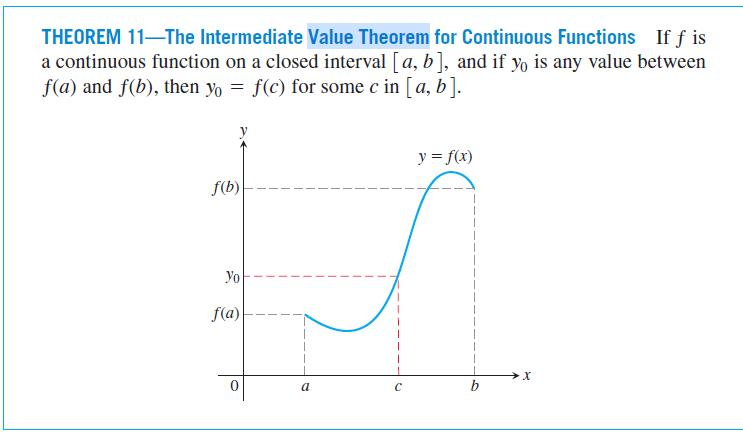

So now that we know under which conditions a solution exists, how can we actually compute it? The answer lies in the word *bisection* in the heading of this section. We simply divide the interval into two equal parts and apply the intermediate value theorem to both of them, to decide which one of these smaller intervals the root lies in. We choose that interval and repeat the bisection until the interval is sufficiently small.

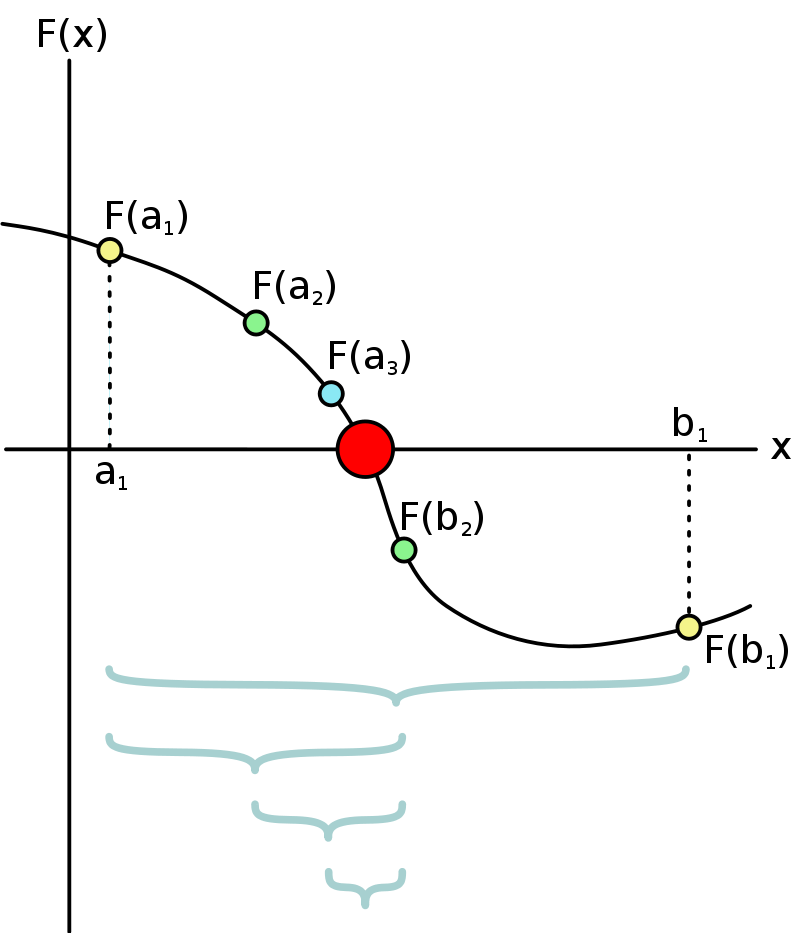

#### Algorithm

The chatty description above gives the idea of how to compute a root. We need to turn this informal description into Python code. To do so, we carefully write the steps down one by one.

1. Start with an interval $a,b$ such that $f(a)f(b)<0$, which is equivalent to $f(a)$ and $f(b)$ having opposite sign. (In particular, $f(a)$ and $f(b)$ should both be not equal to zero, otherwise we are done).
2. Compute the midpoint $m=(a+b)/2$. (If $f(m)$ is equal to zero, we are done.)
3. Determine in which subinterval $f$ changes sign:
   1. If $f(a)f(m)<0$ then let the next interval be $[a,m]$, i.e. replace the right boundary by $m$ by assigning $b=m$
   2. If $f(m)f(b)<0$ then let the next interval be $[m,b]$, i.e. replace the left boundary by $m$ by assigning $a=m$
4. Repeat steps (2.) and (3.) until the interval $[a,b]$ is sufficiently small.
5. Return the midpoint value $m$ as an approximation of the root.


Let's look at this in action.

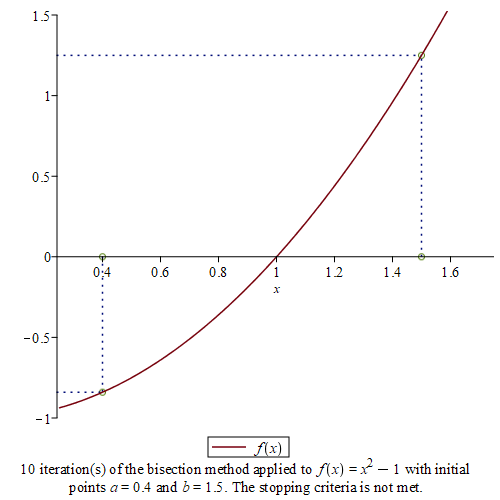

There is still something missing in the above algorithm, as we haven't specified what *sufficiently small* means. We know that the interval shrinks by a factor $1/2$ during each iteration, which means that after $N$ iterations the initial interval size $b-a$ is reduced by a factor $(1/2)^N$ to $(b-a)/2^N$. As both the midpoint $m$ and a root $x$ are inside that interval, we know that the error is bounded by
$$|m-x|<\frac{b-a}{2^N}\;.$$
So if we want the error to be less than some given positive $\epsilon$, we need to iterate until $(b-a)/2^N<\epsilon$, or equivalently,
$$N>\frac1{\log2}\log\left(\frac{b-a}\epsilon\right)\;.$$

#### The Python code

The above algorithm now translates nicely into Python code. The central part of this algorithm looks as follows.
```python
def bisection(f,a,b,N):    
    for n in range(N):
        m=(a+b)/2
        if f(a)*f(m)<0:
            b=m
        elif f(m)*f(b)<0:
            a=m
    return (a+b)/2
```
However, this doesn't cover everything that could happen, for example $f(a)$, $f(b)$, or $f(m)$ could become zero. The final code becomes a bit longer after adding the missing bits and putting some comments in.

In [31]:
def bisection(f,a,b,N):
    # step 0. check for the obvious
    if f(a)==0:
        print ("Found exact solution.")
        return a
    if f(b)==0:
        print ("Found exact solution.")
        return b
    # step 1. ensure that f(a)f(b)<0
    if f(a)*f(b)>=0: # no change of sign or product f(a)*f(b) becomes too small. (*)
        print("Bisection method fails.")
        return None # remember what None stands for!
    # now start the N-fold loop
    for n in range(N):
        # step 2. compute the midpoint
        m=(a+b)/2
        if f(m)==0:
            print ("Found exact solution.")
            return m
        # step 3.
        if f(a)*f(m)<0: # step 3.A.
            b=m
        elif f(m)*f(b)<0: # step 3.B.
            a=m
        else: # Logically, this should not happen. 
              # But we're dealing with floating point operations. (*)
            print("Bisection method fails.")
            return None # remember what None stands for!
    print("Computed approximate solution.")
    return (a+b)/2

Note that we heavily use the fact that we can finish the execution of a function *anywhere* inside the function by using return. One exercise for you could be to rewrite the bisection code using only one `return` statement at the end of the function - this gets quite messy!

Let us test this on a nice function such as $f(x)=(x-3)(x+1)$. We should have no problems finding the simple roots at $x=-1$ and $x=3$.

In [32]:
print(bisection(lambda x:(x-3)*(x+1),-5,0,8))
print(bisection(lambda x:(x-3)*(x+1),0,5,8))

Computed approximate solution.
-1.005859375
Computed approximate solution.
2.998046875


Let us finally elaborate on (*) in the code for `bisection()` above: It could happen that $f(a)$, $f(b)$, and $f(m)$ are sufficiently small that the products are indistinguishable from zero. For example, let $f(x)=cx$ with a very small constant $c$:

In [33]:
print(bisection(lambda x: x,-2,1,30))
print(bisection(lambda x: 1e-100*x,-2,1,30))
print(bisection(lambda x: 1e-200*x,-2,1,30))

Computed approximate solution.
-4.656612873077393e-10
Computed approximate solution.
-4.656612873077393e-10
Bisection method fails.
None


```
There once was a method quite neat,
To find roots, it couldn't be beat.
With bisecting precision,
It made math a mission,
In halves, solutions would meet.
```
                A Limerick by ChatGPT, generated 29 Oct 2023

## Conclusion

This week we have discussed designing algorithms using three different examples from Number Theory (Euclid), Combinatorics (Catalan) and Calculus (Bisection). Note how we focussed on different aspects each time: making the algorithm simpler, making the algorithm faster, and making the algorithm fail-safe (especially important when using floating point operations).